**Part 2. AI Agent 활용 프로젝트**

- Chapter 04. 사전구축 Agent

    - **📒[실습]** Clip 03. AI Data Science Team Agent

# Data Loader Agents 

다양한 형식의 데이터를 로드 하기 위한 에이전트

- CSV files
- Excel files
- Parquet files
- Pickle files
- And more...


`pip install ai-data-science-team`

In [1]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("OPENAI_API_KEY")

In [2]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x0000016C09464DD0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x0000016C09FDCF10>, root_client=<openai.OpenAI object at 0x0000016C06F76890>, root_async_client=<openai.AsyncOpenAI object at 0x0000016C09FCBFD0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Agent 생성하기

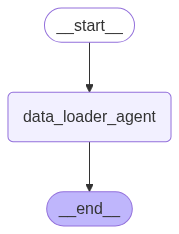

In [3]:
from ai_data_science_team.agents import DataLoaderToolsAgent

data_loader_agent = DataLoaderToolsAgent(
    llm, 
    invoke_react_agent_kwargs={"recursion_limit": 10},
)

data_loader_agent

#### Example 1: 사용 가능한 도구들을 표로 나타내기

`invoke_agent`

```text
Runs the agent with the given user instructions.

Parameters:
----------
user_instructions : str, optional
    The user instructions to pass to the agent.
kwargs : dict, optional
    Additional keyword arguments to pass to the agents invoke method.

```

`get_ai_message` : Returns the AI message from the agent's response.

In [4]:
data_loader_agent.invoke_agent("What tools do you have access to? Return a table.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
    * POST-PROCESS RESULTS


Here's a table summarizing the tools I have access to:

| Tool Name                  | Description                                                                                     |
|----------------------------|-------------------------------------------------------------------------------------------------|
| load_directory             | Loads all recognized tabular files in a directory.                                           |
| load_file                  | Automatically loads a file based on its extension.                                            |
| list_directory_contents     | Lists all files and folders in the specified directory.                                        |
| list_directory_recursive    | Recursively lists all files and folders within the specified directory.                         |
| get_file_info              | Retrieves metadata (size, modification time, etc.) about a file.                              |
| search_files_by_pattern    | Searches for files that match a given wildcard pattern in a specified directory.               | 

If you have any specific requests regarding these tools, feel free to ask!

#### Example 2: 디렉토리 속 폴더와 파일을 불러오기

기본적으로 현재 디렉토리의 파일 목록을 호출할 수 있으며, 필요 시 다른 폴더에서 검색하도록 변경도 가능 (Documents, Downloads, etc.)

In [5]:
data_loader_agent.invoke_agent("What folders and files are available at the root of my directory? Return the file folder structure as code formatted block with the root path at the top and just the top-level folders and files.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
    * Tool: list_directory_contents | c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\Part 2_AI Agent 활용 프로젝트\Chapter 04. 사전구축 Agent\03. AI Data Science Team Agent
    * POST-PROCESS RESULTS


Here's the folder and file structure at the root of your directory:

```
c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\Part 2_AI Agent 활용 프로젝트\Chapter 04. 사전구축 Agent\03. AI Data Science Team Agent
├── pandas_data_analyst.ipynb
├── eda_tools_agent.ipynb
├── data_loader_tools_agent.ipynb
└── data
```

Many of the tools return artifacts. We can access them as follows:

In [6]:
data_loader_agent.get_artifacts(as_dataframe=True)

,filename,type
0,pandas_data_analyst.ipynb,file
1,eda_tools_agent.ipynb,file
2,data_loader_tools_agent.ipynb,file
3,data,directory


#### Example 3: 특정 폴더 속 데이터 열람하기

In [7]:
data_loader_agent.invoke_agent("What is in the data folder?")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
    * Tool: list_directory_contents | c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\Part 2_AI Agent 활용 프로젝트\Chapter 04. 사전구축 Agent\03. AI Data Science Team Agent\data
    * POST-PROCESS RESULTS


The data folder contains the following files:

1. **titanic.csv**
2. **churn_data.csv**
3. **breast_cancer.pkl**
4. **breast_cancer.csv**

There are a total of 4 items in the folder.

#### Example 4: CSV 파일 열기

In [8]:
data_loader_agent.invoke_agent("Load the breast_cancer.csv file from the data folder.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
    * Tool: load_file | c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\Part 2_AI Agent 활용 프로젝트\Chapter 04. 사전구축 Agent\03. AI Data Science Team Agent\data\breast_cancer.csv
    * POST-PROCESS RESULTS


The breast_cancer.csv file has been successfully loaded. If you need any specific information or analysis on this data frame, please let me know!

To extract the data from the artifact, we can use the following code:

In [9]:
data_loader_agent.get_artifacts(as_dataframe=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#### Example 5: pickle 파일 열기

In [10]:
data_loader_agent.invoke_agent("Load the breast_cancer.pkl file from the data folder.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
    * Tool: load_file | c:\Users\pnylo\OneDrive\바탕 화면\Workspace\Langgraph_AIAgent_fastcampus\Part 2_AI Agent 활용 프로젝트\Chapter 04. 사전구축 Agent\03. AI Data Science Team Agent\data\breast_cancer.pkl
    * POST-PROCESS RESULTS


The `breast_cancer.pkl` file has been successfully loaded, and the data frame is now available for use. If you need any specific operations or analyses performed on this data, please let me know!

In [11]:
data_loader_agent.get_artifacts(as_dataframe=True)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#### Example 6: 특정 디렉토리 속 폴더와 파일 확인하기

Now we'll switch things up and look at a directory that is outside of my current working directory. 

In [12]:
data_loader_agent.invoke_agent("What folders and files are available in my Desktop/ directory? Do not return recursive results.")

data_loader_agent.get_ai_message(markdown=True)

---DATA LOADER TOOLS AGENT----
    
    * RUN REACT TOOL-CALLING AGENT
    * Tool: list_directory_contents | c:\Users\pnylo\OneDrive\바탕 화면
    * POST-PROCESS RESULTS


In your Desktop directory, the following folders and files are available:

- **Folders**: 
  - 자료
  - Workspace

- **Files**: 
  - YouTube Music.lnk
  - Google Earth.lnk
  - desktop.ini
  - Cursor.lnk
  - Claude.lnk

Total items: 7.

We can also get the artifacts from the agent:

In [13]:
data_loader_agent.get_artifacts(as_dataframe=True)

,filename,type
0,자료,directory
1,YouTube Music.lnk,file
2,Workspace,directory
3,Google Earth.lnk,file
4,desktop.ini,file
5,Cursor.lnk,file
6,Claude.lnk,file
